In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [2]:
CH = 23
device = torch.device('cuda')
val_dates = ['180328','180329']
test_dates = ['180330','180331']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH=CH)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(125, 11, 25)

### Logistic regression with no regularization

In [32]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.49763819575309753
Val loss for epoch 0: 0.6046831011772156
1
Train loss for epoch 1: 0.4779219925403595
Val loss for epoch 1: 0.5872541069984436
2
Train loss for epoch 2: 0.4730084240436554
Val loss for epoch 2: 0.5618289113044739
3
Train loss for epoch 3: 0.46878162026405334
Val loss for epoch 3: 0.541473388671875
5
Train loss for epoch 5: 0.4630979895591736
Val loss for epoch 5: 0.49683141708374023
7
Train loss for epoch 7: 0.4590514600276947
Val loss for epoch 7: 0.4915775656700134
9
Train loss for epoch 9: 0.4560406506061554
Val loss for epoch 9: 0.48808377981185913
11
Train loss for epoch 11: 0.45351293683052063
Val loss for epoch 11: 0.48025330901145935
19
Train loss for epoch 19: 0.44915181398391724
Val loss for epoch 19: 0.4459119439125061


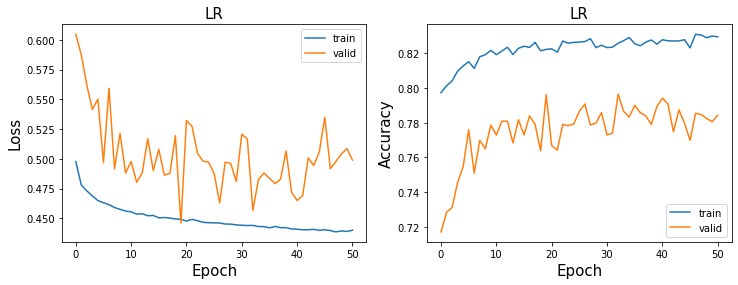

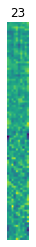

In [10]:
tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.5851735472679138, test accuracy:0.7261961913906225, test percentage postive:0.7385181784629822


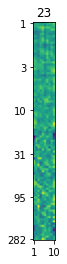

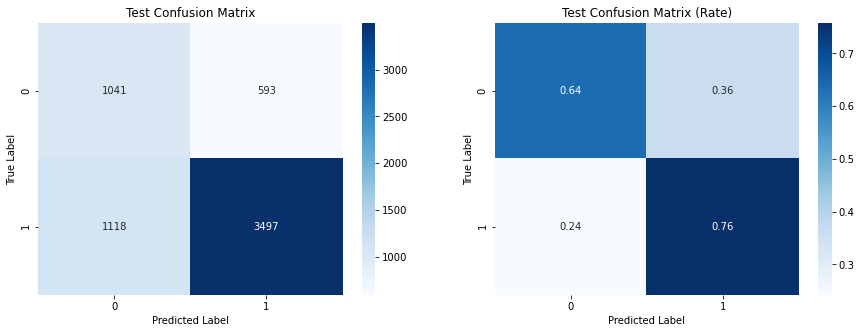

In [33]:
best_epoch = 19
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)

date:180331, rec:005, time:005, label:1.0
Original data 62 CH


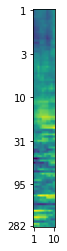

In [85]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][1], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.imshow(weights_sub)
plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
plt.xticks(ticks=[0, 9], labels=[1, 10])
plt.show()

### Logistic regression with L2 regularization

In [30]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.5023506879806519
Val loss for epoch 0: 0.5673563480377197
3
Train loss for epoch 3: 0.4696893095970154
Val loss for epoch 3: 0.5379751324653625
4
Train loss for epoch 4: 0.465746134519577
Val loss for epoch 4: 0.5148765444755554
6
Train loss for epoch 6: 0.4613410532474518
Val loss for epoch 6: 0.49059855937957764
9
Train loss for epoch 9: 0.4565564692020416
Val loss for epoch 9: 0.46369293332099915
26
Train loss for epoch 26: 0.447121262550354
Val loss for epoch 26: 0.45990484952926636


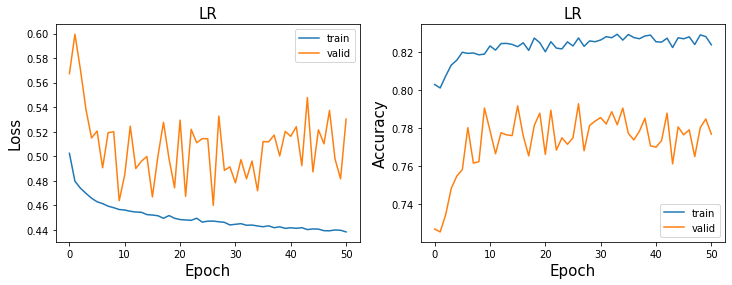

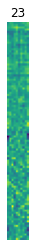

0
Train loss for epoch 0: 0.4403457045555115
Val loss for epoch 0: 0.5139747858047485
2
Train loss for epoch 2: 0.4397614598274231
Val loss for epoch 2: 0.4666662812232971
22
Train loss for epoch 22: 0.43677982687950134
Val loss for epoch 22: 0.4644968509674072
29
Train loss for epoch 29: 0.4357679784297943
Val loss for epoch 29: 0.46087899804115295


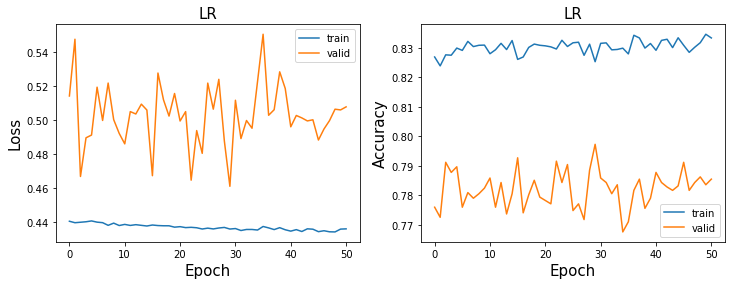

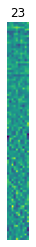

0
Train loss for epoch 0: 0.44972333312034607
Val loss for epoch 0: 0.5480678677558899
1
Train loss for epoch 1: 0.450311541557312
Val loss for epoch 1: 0.5434504747390747
2
Train loss for epoch 2: 0.44981828331947327
Val loss for epoch 2: 0.5254011750221252
4
Train loss for epoch 4: 0.45002779364585876
Val loss for epoch 4: 0.5193865299224854
6
Train loss for epoch 6: 0.44944995641708374
Val loss for epoch 6: 0.5059517621994019
11
Train loss for epoch 11: 0.450196236371994
Val loss for epoch 11: 0.4912508726119995
15
Train loss for epoch 15: 0.45032134652137756
Val loss for epoch 15: 0.4884916841983795
16
Train loss for epoch 16: 0.449875146150589
Val loss for epoch 16: 0.4819338917732239
43
Train loss for epoch 43: 0.44927695393562317
Val loss for epoch 43: 0.46219581365585327


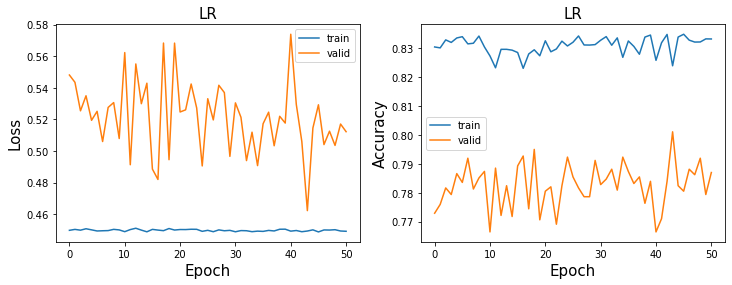

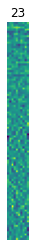

0
Train loss for epoch 0: 0.5990281105041504
Val loss for epoch 0: 0.6285989284515381
3
Train loss for epoch 3: 0.5708180069923401
Val loss for epoch 3: 0.5976194143295288
7
Train loss for epoch 7: 0.5392093062400818
Val loss for epoch 7: 0.5710603594779968
8
Train loss for epoch 8: 0.532788872718811
Val loss for epoch 8: 0.5518181324005127
10
Train loss for epoch 10: 0.5197526216506958
Val loss for epoch 10: 0.5267497897148132
12
Train loss for epoch 12: 0.5088092088699341
Val loss for epoch 12: 0.5212915539741516
16
Train loss for epoch 16: 0.4942232370376587
Val loss for epoch 16: 0.5103492736816406
17
Train loss for epoch 17: 0.49163684248924255
Val loss for epoch 17: 0.48501455783843994
40
Train loss for epoch 40: 0.48816487193107605
Val loss for epoch 40: 0.4828696846961975


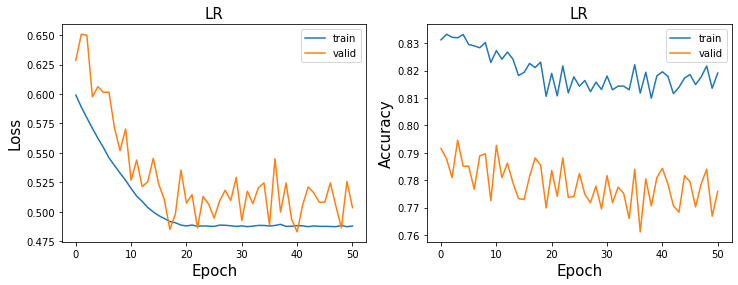

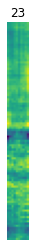

0
Train loss for epoch 0: 0.539703369140625
Val loss for epoch 0: 0.5333535075187683
3
Train loss for epoch 3: 0.5339699387550354
Val loss for epoch 3: 0.518936812877655


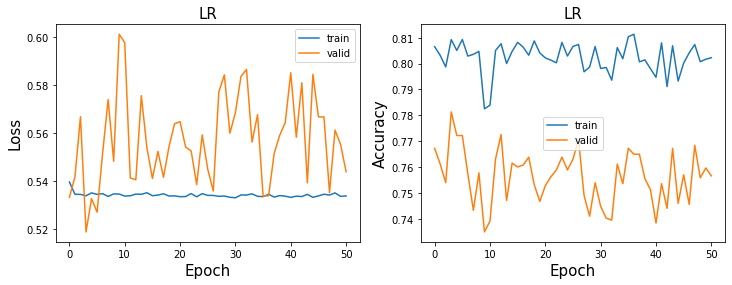

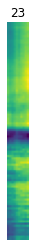

In [12]:
for alpha in [0.01, 0.1, 1, 10, 50]:
    tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.5995981097221375, test accuracy:0.7188350136021764, test percentage postive:0.7385181784629822


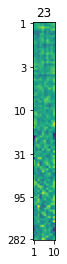

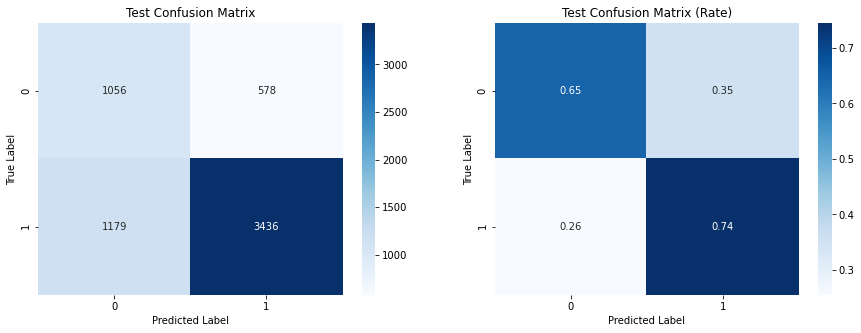

In [31]:
best_epoch = 26
alpha = 0.01
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)

### Logistic Regression with finite difference regularization

In [28]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.5020381212234497
Val loss for epoch 0: 0.596671462059021
1
Train loss for epoch 1: 0.48048126697540283
Val loss for epoch 1: 0.5926393270492554
2
Train loss for epoch 2: 0.47415536642074585
Val loss for epoch 2: 0.554466187953949
3
Train loss for epoch 3: 0.4699791967868805
Val loss for epoch 3: 0.5195402503013611
8
Train loss for epoch 8: 0.4580579400062561
Val loss for epoch 8: 0.5081886649131775
10
Train loss for epoch 10: 0.45576825737953186
Val loss for epoch 10: 0.4909602999687195
12
Train loss for epoch 12: 0.4533825218677521
Val loss for epoch 12: 0.48606783151626587
13
Train loss for epoch 13: 0.4531823992729187
Val loss for epoch 13: 0.4720878005027771
18
Train loss for epoch 18: 0.4506213665008545
Val loss for epoch 18: 0.4654473662376404
19
Train loss for epoch 19: 0.44932204484939575
Val loss for epoch 19: 0.4614095389842987
48
Train loss for epoch 48: 0.44002223014831543
Val loss for epoch 48: 0.4604750871658325


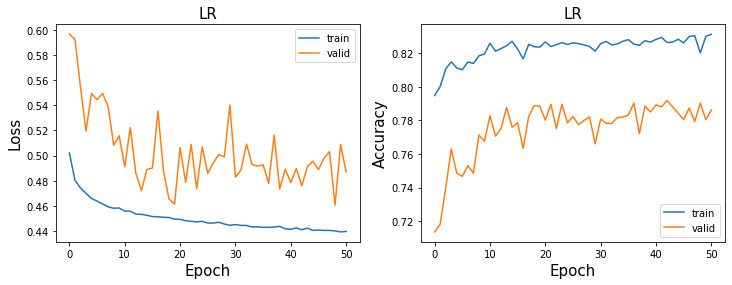

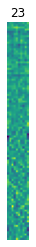

0
Train loss for epoch 0: 0.4418209195137024
Val loss for epoch 0: 0.5079829692840576
1
Train loss for epoch 1: 0.44152089953422546
Val loss for epoch 1: 0.4846915304660797
2
Train loss for epoch 2: 0.44162482023239136
Val loss for epoch 2: 0.4798651933670044
6
Train loss for epoch 6: 0.4415142238140106
Val loss for epoch 6: 0.4696146845817566
13
Train loss for epoch 13: 0.4416847825050354
Val loss for epoch 13: 0.4600982964038849


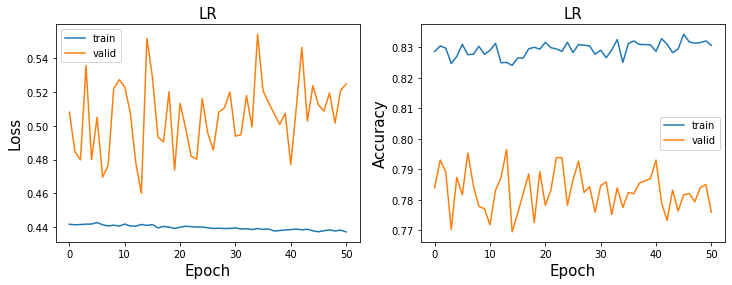

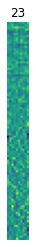

0
Train loss for epoch 0: 0.47723323106765747
Val loss for epoch 0: 0.5468652248382568
6
Train loss for epoch 6: 0.47467830777168274
Val loss for epoch 6: 0.5193158388137817
9
Train loss for epoch 9: 0.47316327691078186
Val loss for epoch 9: 0.518599808216095
22
Train loss for epoch 22: 0.47055739164352417
Val loss for epoch 22: 0.5185592770576477
25
Train loss for epoch 25: 0.46839919686317444
Val loss for epoch 25: 0.5080986022949219
35
Train loss for epoch 35: 0.46676287055015564
Val loss for epoch 35: 0.5070092678070068
37
Train loss for epoch 37: 0.467238187789917
Val loss for epoch 37: 0.49012434482574463
42
Train loss for epoch 42: 0.4655849039554596
Val loss for epoch 42: 0.48146337270736694


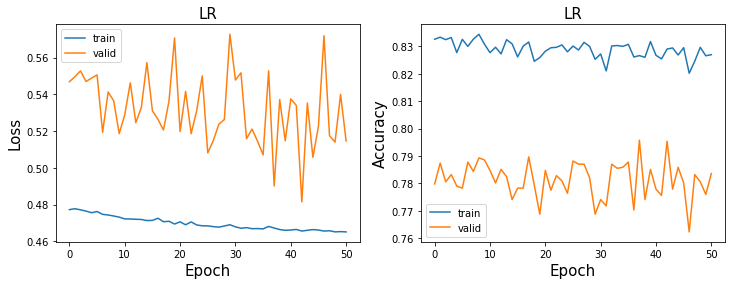

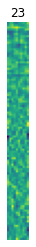

0
Train loss for epoch 0: 0.6228980422019958
Val loss for epoch 0: 0.6327911615371704
1
Train loss for epoch 1: 0.5670948028564453
Val loss for epoch 1: 0.5868821740150452
2
Train loss for epoch 2: 0.5267625451087952
Val loss for epoch 2: 0.5475977063179016
3
Train loss for epoch 3: 0.5038028955459595
Val loss for epoch 3: 0.5135751962661743
4
Train loss for epoch 4: 0.4901335537433624
Val loss for epoch 4: 0.4961097240447998
5
Train loss for epoch 5: 0.48464664816856384
Val loss for epoch 5: 0.4791207015514374
19
Train loss for epoch 19: 0.4822063446044922
Val loss for epoch 19: 0.47603416442871094


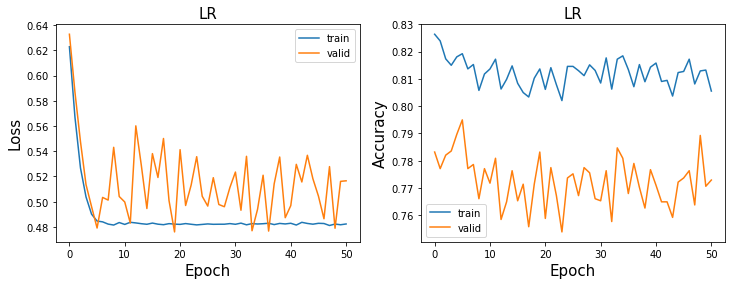

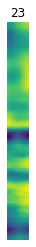

0
Train loss for epoch 0: 0.5028459429740906
Val loss for epoch 0: 0.5174970626831055
6
Train loss for epoch 6: 0.5013291239738464
Val loss for epoch 6: 0.5126777291297913
11
Train loss for epoch 11: 0.5008800029754639
Val loss for epoch 11: 0.4879493713378906
31
Train loss for epoch 31: 0.5012633204460144
Val loss for epoch 31: 0.48015427589416504


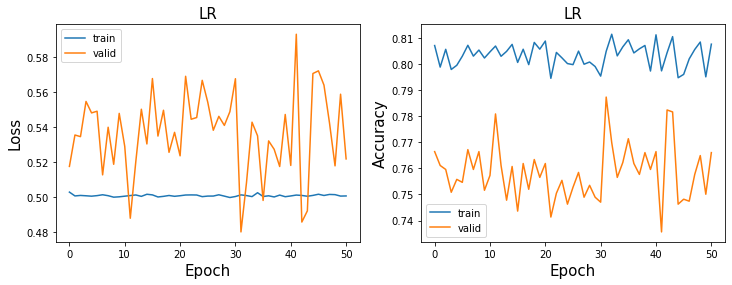

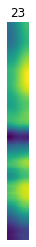

In [14]:
for alpha in [0.01, 0.1, 1, 10, 50]:
    tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.6026095747947693, test accuracy:0.7215554488718194, test percentage postive:0.7385181784629822


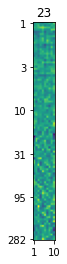

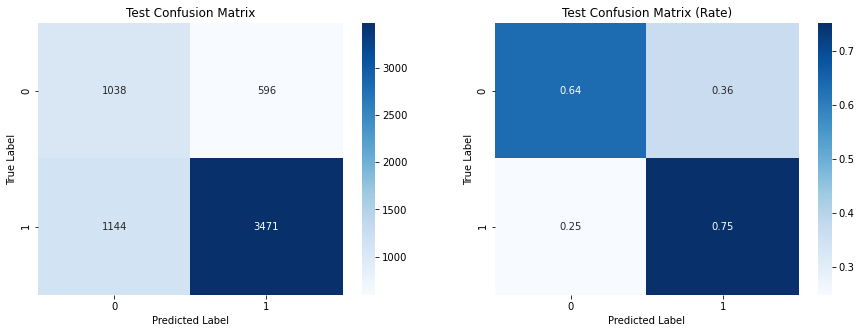

In [29]:
best_epoch = 48 # need more
alpha = 0.01
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)

### SVM without regularization

In [26]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.5548518300056458
Val loss for epoch 0: 0.7200368046760559
1
Train loss for epoch 1: 0.5177791118621826
Val loss for epoch 1: 0.6622995734214783
2
Train loss for epoch 2: 0.5070406198501587
Val loss for epoch 2: 0.6251105070114136
4
Train loss for epoch 4: 0.49413976073265076
Val loss for epoch 4: 0.6080098152160645
7
Train loss for epoch 7: 0.48404237627983093
Val loss for epoch 7: 0.5960050821304321
8
Train loss for epoch 8: 0.4810608923435211
Val loss for epoch 8: 0.5355154871940613
21
Train loss for epoch 21: 0.46720319986343384
Val loss for epoch 21: 0.5346387624740601
40
Train loss for epoch 40: 0.4572518765926361
Val loss for epoch 40: 0.5145748853683472


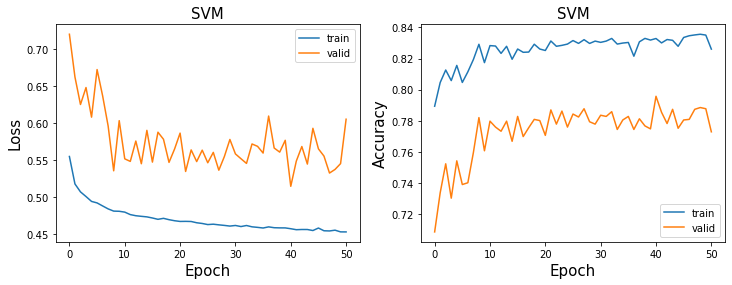

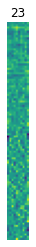

In [16]:
tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.70947265625, test accuracy:0.7135541686669867, test percentage postive:0.7385181784629822


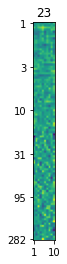

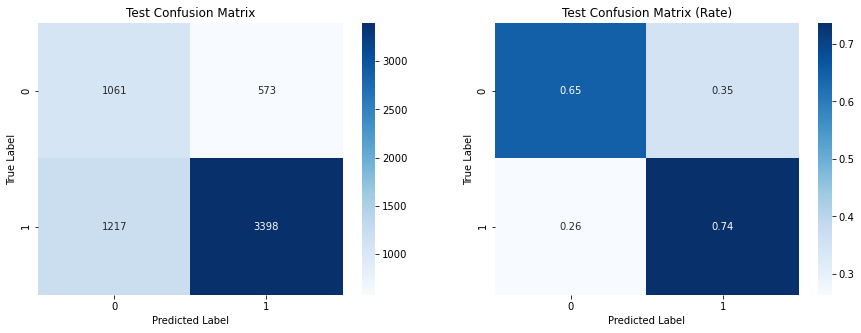

In [27]:
best_epoch = 40
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)

### SVM with L2 regularization

In [23]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.5573115348815918
Val loss for epoch 0: 0.6965234279632568
1
Train loss for epoch 1: 0.5145357251167297
Val loss for epoch 1: 0.6556702852249146
4
Train loss for epoch 4: 0.492395281791687
Val loss for epoch 4: 0.5931393504142761
5
Train loss for epoch 5: 0.4905768632888794
Val loss for epoch 5: 0.5873909592628479
6
Train loss for epoch 6: 0.4868890047073364
Val loss for epoch 6: 0.5704143643379211
7
Train loss for epoch 7: 0.484390527009964
Val loss for epoch 7: 0.5654737949371338
9
Train loss for epoch 9: 0.4795179069042206
Val loss for epoch 9: 0.5633800625801086
10
Train loss for epoch 10: 0.47888651490211487
Val loss for epoch 10: 0.5398616194725037
19
Train loss for epoch 19: 0.4684270918369293
Val loss for epoch 19: 0.5303852558135986
24
Train loss for epoch 24: 0.46414878964424133
Val loss for epoch 24: 0.5189204216003418


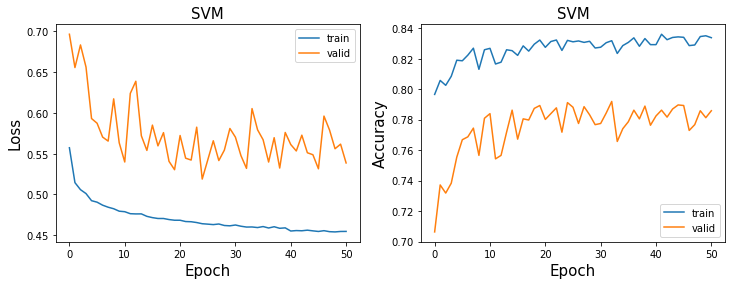

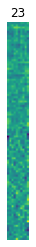

0
Train loss for epoch 0: 0.4547346234321594
Val loss for epoch 0: 0.5879461765289307
1
Train loss for epoch 1: 0.4538080096244812
Val loss for epoch 1: 0.5298958420753479
15
Train loss for epoch 15: 0.4513304531574249
Val loss for epoch 15: 0.5243750214576721


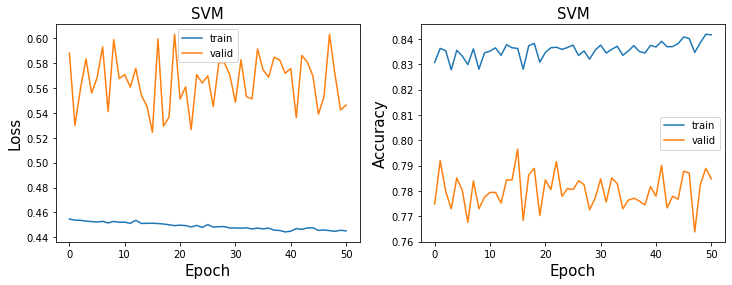

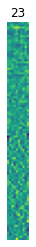

0
Train loss for epoch 0: 0.4579564034938812
Val loss for epoch 0: 0.5855013132095337
2
Train loss for epoch 2: 0.4591429531574249
Val loss for epoch 2: 0.578001856803894
7
Train loss for epoch 7: 0.46026861667633057
Val loss for epoch 7: 0.5523051619529724
11
Train loss for epoch 11: 0.4583218991756439
Val loss for epoch 11: 0.5302448868751526


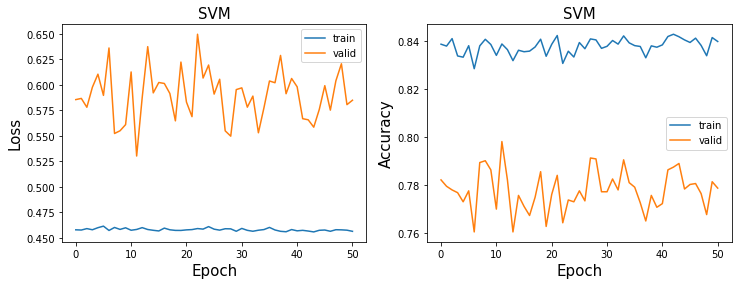

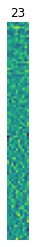

0
Train loss for epoch 0: 0.6006578207015991
Val loss for epoch 0: 0.7400628328323364
1
Train loss for epoch 1: 0.6010969877243042
Val loss for epoch 1: 0.6976342797279358
4
Train loss for epoch 4: 0.5848100781440735
Val loss for epoch 4: 0.6895183324813843
6
Train loss for epoch 6: 0.5769520401954651
Val loss for epoch 6: 0.686752438545227
7
Train loss for epoch 7: 0.5728543400764465
Val loss for epoch 7: 0.672522246837616
12
Train loss for epoch 12: 0.5558640956878662
Val loss for epoch 12: 0.6421563029289246
17
Train loss for epoch 17: 0.5415239930152893
Val loss for epoch 17: 0.5793778300285339
25
Train loss for epoch 25: 0.5245056748390198
Val loss for epoch 25: 0.5578920245170593
30
Train loss for epoch 30: 0.5175313353538513
Val loss for epoch 30: 0.5457035899162292
37
Train loss for epoch 37: 0.5129928588867188
Val loss for epoch 37: 0.5350093841552734


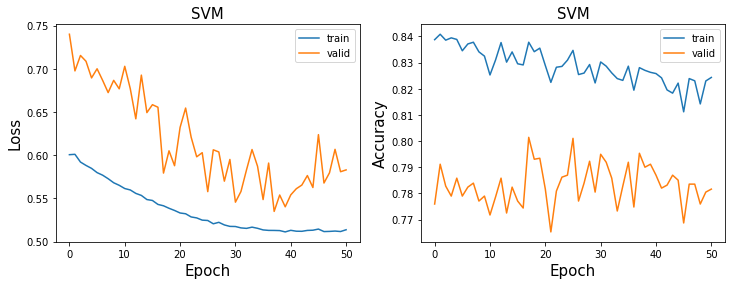

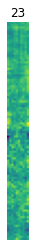

0
Train loss for epoch 0: 0.5794543623924255
Val loss for epoch 0: 0.6022132039070129
2
Train loss for epoch 2: 0.5635626316070557
Val loss for epoch 2: 0.5918344259262085
11
Train loss for epoch 11: 0.5635076761245728
Val loss for epoch 11: 0.580695390701294
14
Train loss for epoch 14: 0.563811719417572
Val loss for epoch 14: 0.5536472797393799


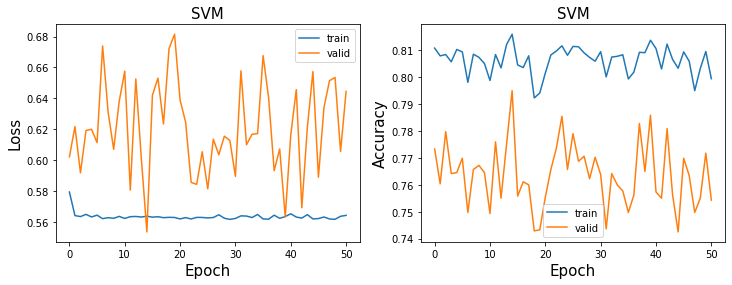

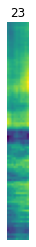

In [18]:
for alpha in [0.01, 0.1, 1, 10, 50]:
    tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.7039059400558472, test accuracy:0.718514962393983, test percentage postive:0.7385181784629822


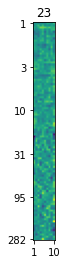

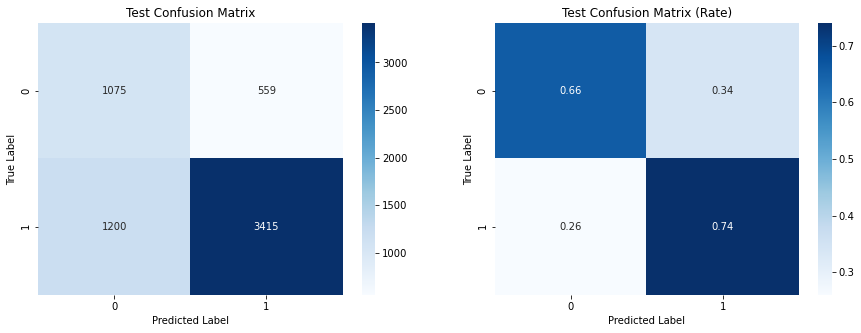

In [24]:
best_epoch = 24
alpha = 0.01
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)

### SVM with finite difference regularization

In [20]:
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

0
Train loss for epoch 0: 0.5597909092903137
Val loss for epoch 0: 0.6705857515335083
2
Train loss for epoch 2: 0.507340133190155
Val loss for epoch 2: 0.6695071458816528
3
Train loss for epoch 3: 0.5006424784660339
Val loss for epoch 3: 0.5960164666175842
8
Train loss for epoch 8: 0.48235857486724854
Val loss for epoch 8: 0.5724549293518066
9
Train loss for epoch 9: 0.4798462986946106
Val loss for epoch 9: 0.5702877640724182
11
Train loss for epoch 11: 0.47610917687416077
Val loss for epoch 11: 0.5654791593551636
13
Train loss for epoch 13: 0.47508084774017334
Val loss for epoch 13: 0.557769238948822
14
Train loss for epoch 14: 0.47300657629966736
Val loss for epoch 14: 0.5457425713539124
16
Train loss for epoch 16: 0.471828430891037
Val loss for epoch 16: 0.540769636631012
17
Train loss for epoch 17: 0.47048962116241455
Val loss for epoch 17: 0.5310779809951782
18
Train loss for epoch 18: 0.4696767032146454
Val loss for epoch 18: 0.5296596884727478
32
Train loss for epoch 32: 0.46081

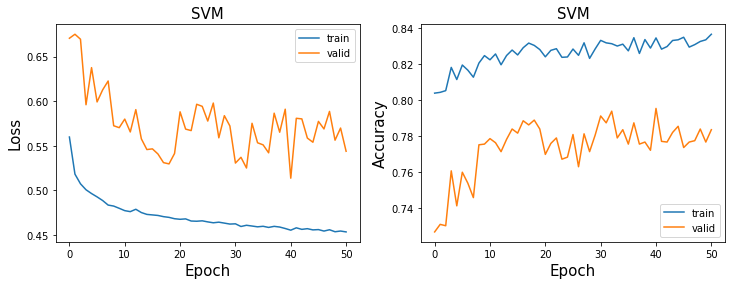

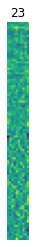

0
Train loss for epoch 0: 0.45584383606910706
Val loss for epoch 0: 0.5875375270843506
2
Train loss for epoch 2: 0.45695245265960693
Val loss for epoch 2: 0.5780278444290161
3
Train loss for epoch 3: 0.45483097434043884
Val loss for epoch 3: 0.5743520855903625
4
Train loss for epoch 4: 0.45379266142845154
Val loss for epoch 4: 0.5710088014602661
5
Train loss for epoch 5: 0.4567180573940277
Val loss for epoch 5: 0.5406897664070129
8
Train loss for epoch 8: 0.45423728227615356
Val loss for epoch 8: 0.5170820951461792


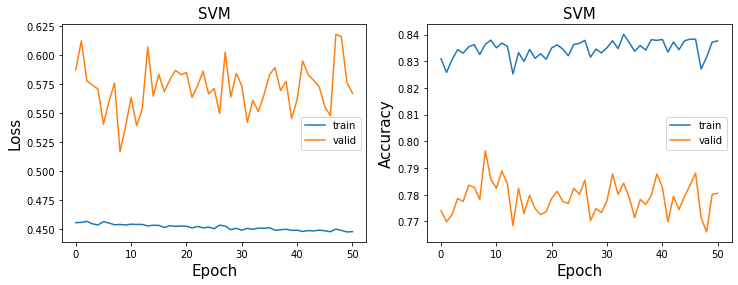

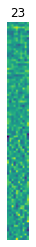

0
Train loss for epoch 0: 0.48599347472190857
Val loss for epoch 0: 0.6305402517318726
1
Train loss for epoch 1: 0.4861355423927307
Val loss for epoch 1: 0.6108576655387878
2
Train loss for epoch 2: 0.48409193754196167
Val loss for epoch 2: 0.5792694687843323
5
Train loss for epoch 5: 0.48563051223754883
Val loss for epoch 5: 0.5784934759140015
9
Train loss for epoch 9: 0.4828317165374756
Val loss for epoch 9: 0.5704634189605713
26
Train loss for epoch 26: 0.4828987121582031
Val loss for epoch 26: 0.5589199066162109


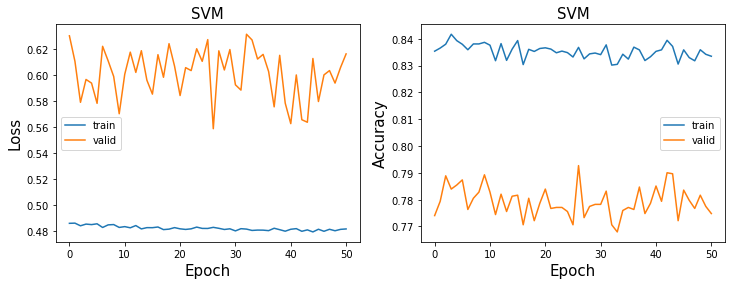

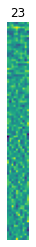

0
Train loss for epoch 0: 0.7265939712524414
Val loss for epoch 0: 0.8084595799446106
1
Train loss for epoch 1: 0.6874639391899109
Val loss for epoch 1: 0.7635921239852905
2
Train loss for epoch 2: 0.6501680612564087
Val loss for epoch 2: 0.7046699523925781
3
Train loss for epoch 3: 0.6153287291526794
Val loss for epoch 3: 0.6912941932678223
4
Train loss for epoch 4: 0.5904279351234436
Val loss for epoch 4: 0.6874276399612427
5
Train loss for epoch 5: 0.5649348497390747
Val loss for epoch 5: 0.5954998731613159
6
Train loss for epoch 6: 0.5477927923202515
Val loss for epoch 6: 0.5527017712593079
19
Train loss for epoch 19: 0.511491060256958
Val loss for epoch 19: 0.545448362827301
22
Train loss for epoch 22: 0.5161607265472412
Val loss for epoch 22: 0.5048167705535889


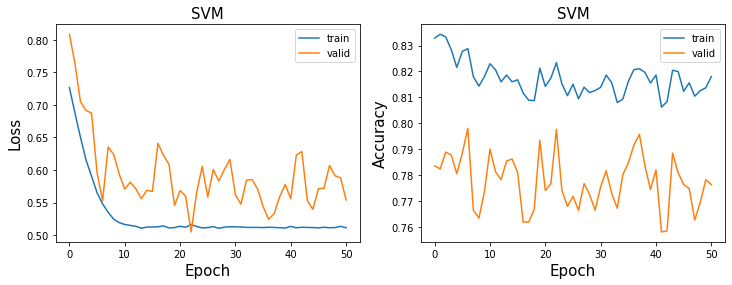

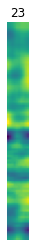

0
Train loss for epoch 0: 0.5406335592269897
Val loss for epoch 0: 0.5640416741371155
5
Train loss for epoch 5: 0.5331677198410034
Val loss for epoch 5: 0.5457605719566345
26
Train loss for epoch 26: 0.5329784750938416
Val loss for epoch 26: 0.544267475605011


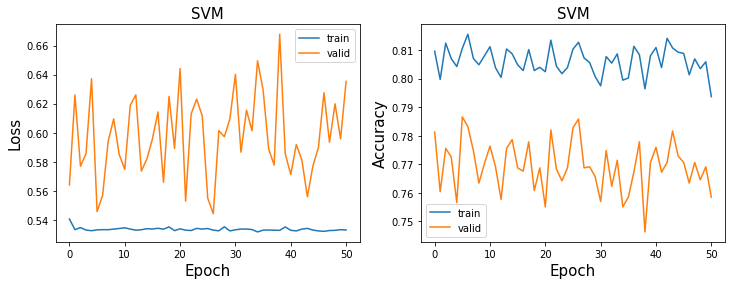

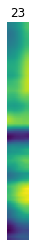

In [20]:
for alpha in [0.01, 0.1, 1, 10, 50]:
    tuning(train_loader, val_loader, model, optimizer, device, num_epochs, alpha, model_type, loss_type, reg_type, CH, save_path)

test loss:0.6926111578941345, test accuracy:0.7324371899503921, test percentage postive:0.7385181784629822


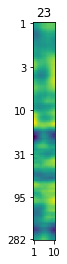

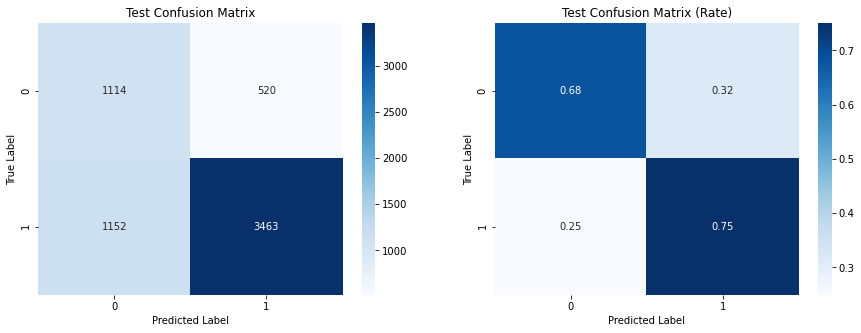

In [22]:
best_epoch = 22
alpha = 10
model = GLM(input_dim=100*10).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{}, test accuracy:{}, test percentage postive:{}'.format(test_loss, test_acc, np.mean(np.concatenate(test_labels))))
plot_weight_glm(device, save_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)
plot_confusion(test_preds, test_labels)